### Natalidad EDA

Análisis de datos exploratorio por municipio de los nacimientos de 1990-2020, utilizando el archivo: 'data/processed/natalidad_sonora_municipio_tidy_nacimientos_mayorIgual12_tidy.csv'

In [3]:
#Realizando los imports necesarios
import pandas as pd
import missingno as msno
import plotly.express as px
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np



In [4]:
#Leyendo los datos
natalidad_data = pd.read_csv('../data/processed/natalidad_sonora_municipio_tidy_nacimientos_mayorIgual12_tidy.csv')
natalidad_data.head()

,cve_municipio,desc_municipio,1990,1994,1995,1996,1997,1998,1999,2000,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,1,Aconchi,NaN,68.0,59.0,75.0,63.0,66.0,86.0,77.0,...,46.0,46.0,37.0,33.0,40.0,43.0,26.0,38.0,34.0,29.0
1,2,Agua Prieta,NaN,1589.0,1665.0,1721.0,1723.0,1801.0,1900.0,1860.0,...,1709.0,1886.0,1769.0,1575.0,1473.0,1400.0,1466.0,1477.0,1492.0,955.0
2,3,Alamos,NaN,674.0,575.0,732.0,579.0,615.0,698.0,633.0,...,613.0,527.0,544.0,473.0,443.0,428.0,391.0,344.0,354.0,291.0
3,4,Altar,NaN,151.0,176.0,172.0,198.0,208.0,212.0,238.0,...,208.0,227.0,233.0,213.0,181.0,165.0,190.0,169.0,171.0,115.0
4,5,Arivechi,NaN,82.0,30.0,23.0,46.0,35.0,22.0,34.0,...,15.0,22.0,17.0,17.0,14.0,19.0,13.0,18.0,16.0,6.0


<AxesSubplot:>

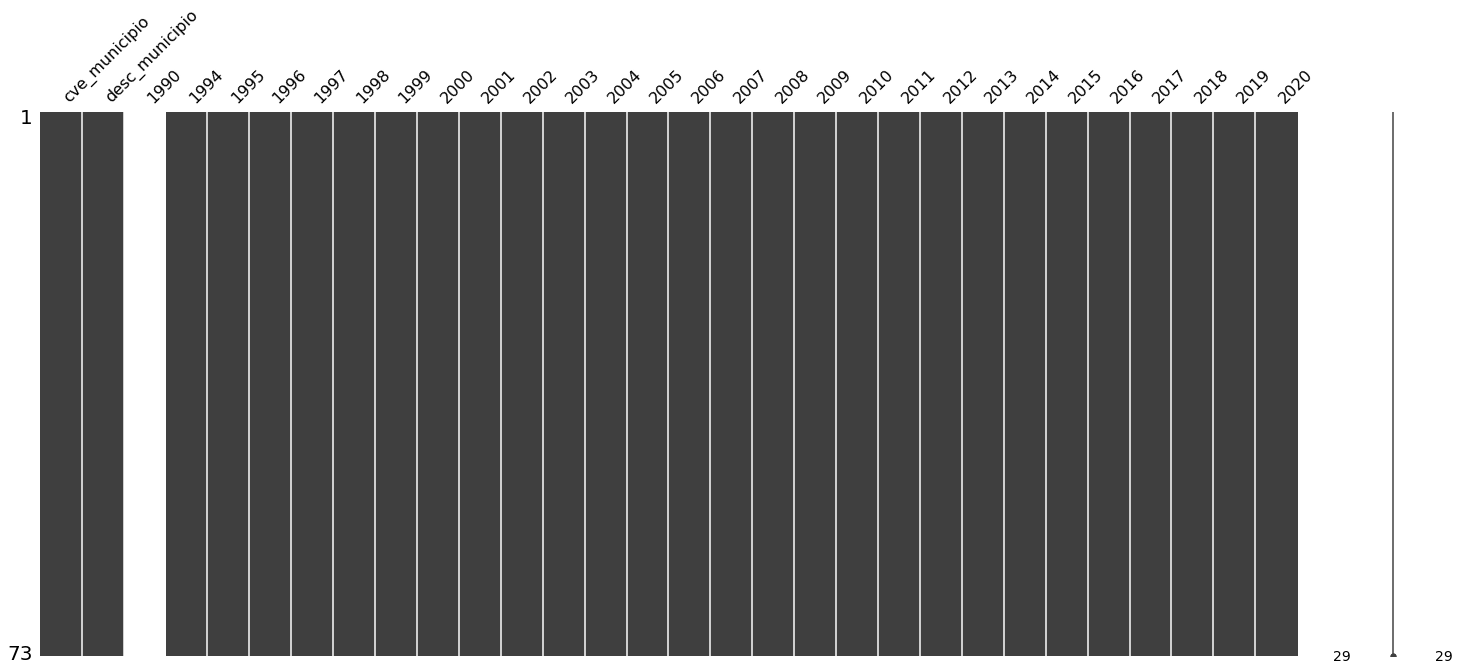

In [5]:
#Viendo datos perdidos 
msno.matrix(natalidad_data)

In [6]:
#Removiendo columnas que no son necesarias
natalidad_data.drop(['cve_municipio', '1990'], axis=1, inplace=True)

In [7]:
#Renombrando columnas
natalidad_data.rename({'desc_municipio':'municipio'}, axis=1, inplace=True)

In [8]:
list(natalidad_data.iloc[:,1:].columns)

['1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019',
 '2020']

In [9]:
nacimientos_tidy = pd.melt(natalidad_data, id_vars='municipio', value_vars =list(natalidad_data.iloc[:,1:].columns),var_name='año', value_name='nacimientos')
nacimientos_tidy

,municipio,año,nacimientos
0,Aconchi,1994,68.0
1,Agua Prieta,1994,1589.0
2,Alamos,1994,674.0
3,Altar,1994,151.0
4,Arivechi,1994,82.0
...,...,...,...
1966,Yécora,2020,61.0
1967,General Plutarco Elías Calles,2020,115.0
1968,Benito Juárez,2020,291.0
1969,San Ignacio Río Muerto,2020,212.0


In [10]:
nacimientos_tidy['año'] = nacimientos_tidy['año'].astype('int64') 

In [11]:
#Graficando Serie de tiempo para cada uno de los municipios
fig = px.line(nacimientos_tidy, x="año", y='nacimientos',color='municipio',
              title='Nacimientos en los municipios de Sonora',
              labels={'municipio':'Municipio',
                      'año':'Año'},
                template='ggplot2')

fig.show()

In [12]:
dff = nacimientos_tidy.groupby('año')['nacimientos'].sum()
fig = px.bar(dff, x=dff.index, y=dff.values, 
             labels={'y': 'Nacimientos',
                     'año':'Año'},
             title='Nacimientos totales en Sonora',
             template='ggplot2')
fig.show()


In [13]:
fig = px.bar(nacimientos_tidy, x="año", y='nacimientos',color='municipio',
              title='Nacimientos en los municipios de Hermosillo',
              labels={'municipio':'Municipio',
                      'año':'Año'},
                template='ggplot2')

fig.show()

In [14]:
dff = nacimientos_tidy[nacimientos_tidy['municipio'] == 'Hermosillo']
fig = px.scatter(dff, x="año", y="nacimientos", trendline="ols",
                title='Nacimientos en Hermosillo',
                labels={'municipio':'Municipio',
                      'año':'Año'},
                template='ggplot2')
fig.show()

In [15]:
tendencias = pd.DataFrame()
#Obteniendo la tendencia para cada municipio
for municipio in nacimientos_tidy['municipio'].unique():
    dff = nacimientos_tidy[nacimientos_tidy['municipio'] == municipio]
    X = dff[['año']] # here we have 2 variables for the multiple linear regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example
    Y = dff['nacimientos']
    X = sm.add_constant(X) # adding a constant

    model = sm.OLS(Y, X).fit()
    predictions = model.predict(X) 

    df = pd.DataFrame({"municipio":[municipio],
                    "tendencia":[model.params[1]]})
    tendencias = pd.concat([tendencias, df])

In [45]:
tendencias

,municipio,tendencia
0,Aconchi,-1.741758
0,Agua Prieta,-15.336996
0,Alamos,-12.514042
0,Altar,-1.006105
0,Arivechi,-1.212454
...,...,...
0,Yécora,-3.632479
0,General Plutarco Elías Calles,-3.808303
0,Benito Juárez,7.216728
0,San Ignacio Río Muerto,4.863858


In [47]:
dff = nacimientos_tidy[nacimientos_tidy['municipio'] == 'Benito Juárez']
fig = px.scatter(dff, x="año", y="nacimientos", trendline="ols",
                title='Nacimientos en Benito Juarez',
                labels={'municipio':'Municipio',
                      'año':'Año'},
                template='ggplot2')
fig.show()

### Natalidad por municipio

In [15]:
municipos = nacimientos_tidy['municipio'].unique()
count = len(municipos)

In [19]:
municipos

array(['Aconchi', 'Agua Prieta', 'Alamos', 'Altar', 'Arivechi', 'Arizpe',
       'Atil', 'Bacadéhuachi', 'Bacanora', 'Bacerac', 'Bacoachi', 'Bácum',
       'Banámichi', 'Baviácora', 'Bavispe', 'Benjamín Hill', 'Caborca',
       'Cajeme', 'Cananea', 'Carbó', 'La Colorada', 'Cucurpe', 'Cumpas',
       'Divisaderos', 'Empalme', 'Etchojoa', 'Fronteras', 'Granados',
       'Guaymas', 'Hermosillo', 'Huachinera', 'Huásabas', 'Huatabampo',
       'Huépac', 'Imuris', 'Magdalena', 'Mazatán', 'Moctezuma', 'Naco',
       'Nácori Chico', 'Nacozari de García', 'Navojoa', 'Nogales',
       'Onavas', 'Opodepe', 'Oquitoa', 'Pitiquito', 'Puerto Peñasco',
       'Quiriego', 'Rayón', 'Rosario', 'Sahuaripa', 'San Felipe de Jesús',
       'San Javier', 'San Luis Río Colorado', 'San Miguel de Horcasitas',
       'San Pedro de la Cueva', 'Santa Ana', 'Santa Cruz', 'Sáric',
       'Soyopa', 'Suaqui Grande', 'Tepache', 'Trincheras', 'Tubutama',
       'Ures', 'Villa Hidalgo', 'Villa Pesqueira', 'Yécora',
      

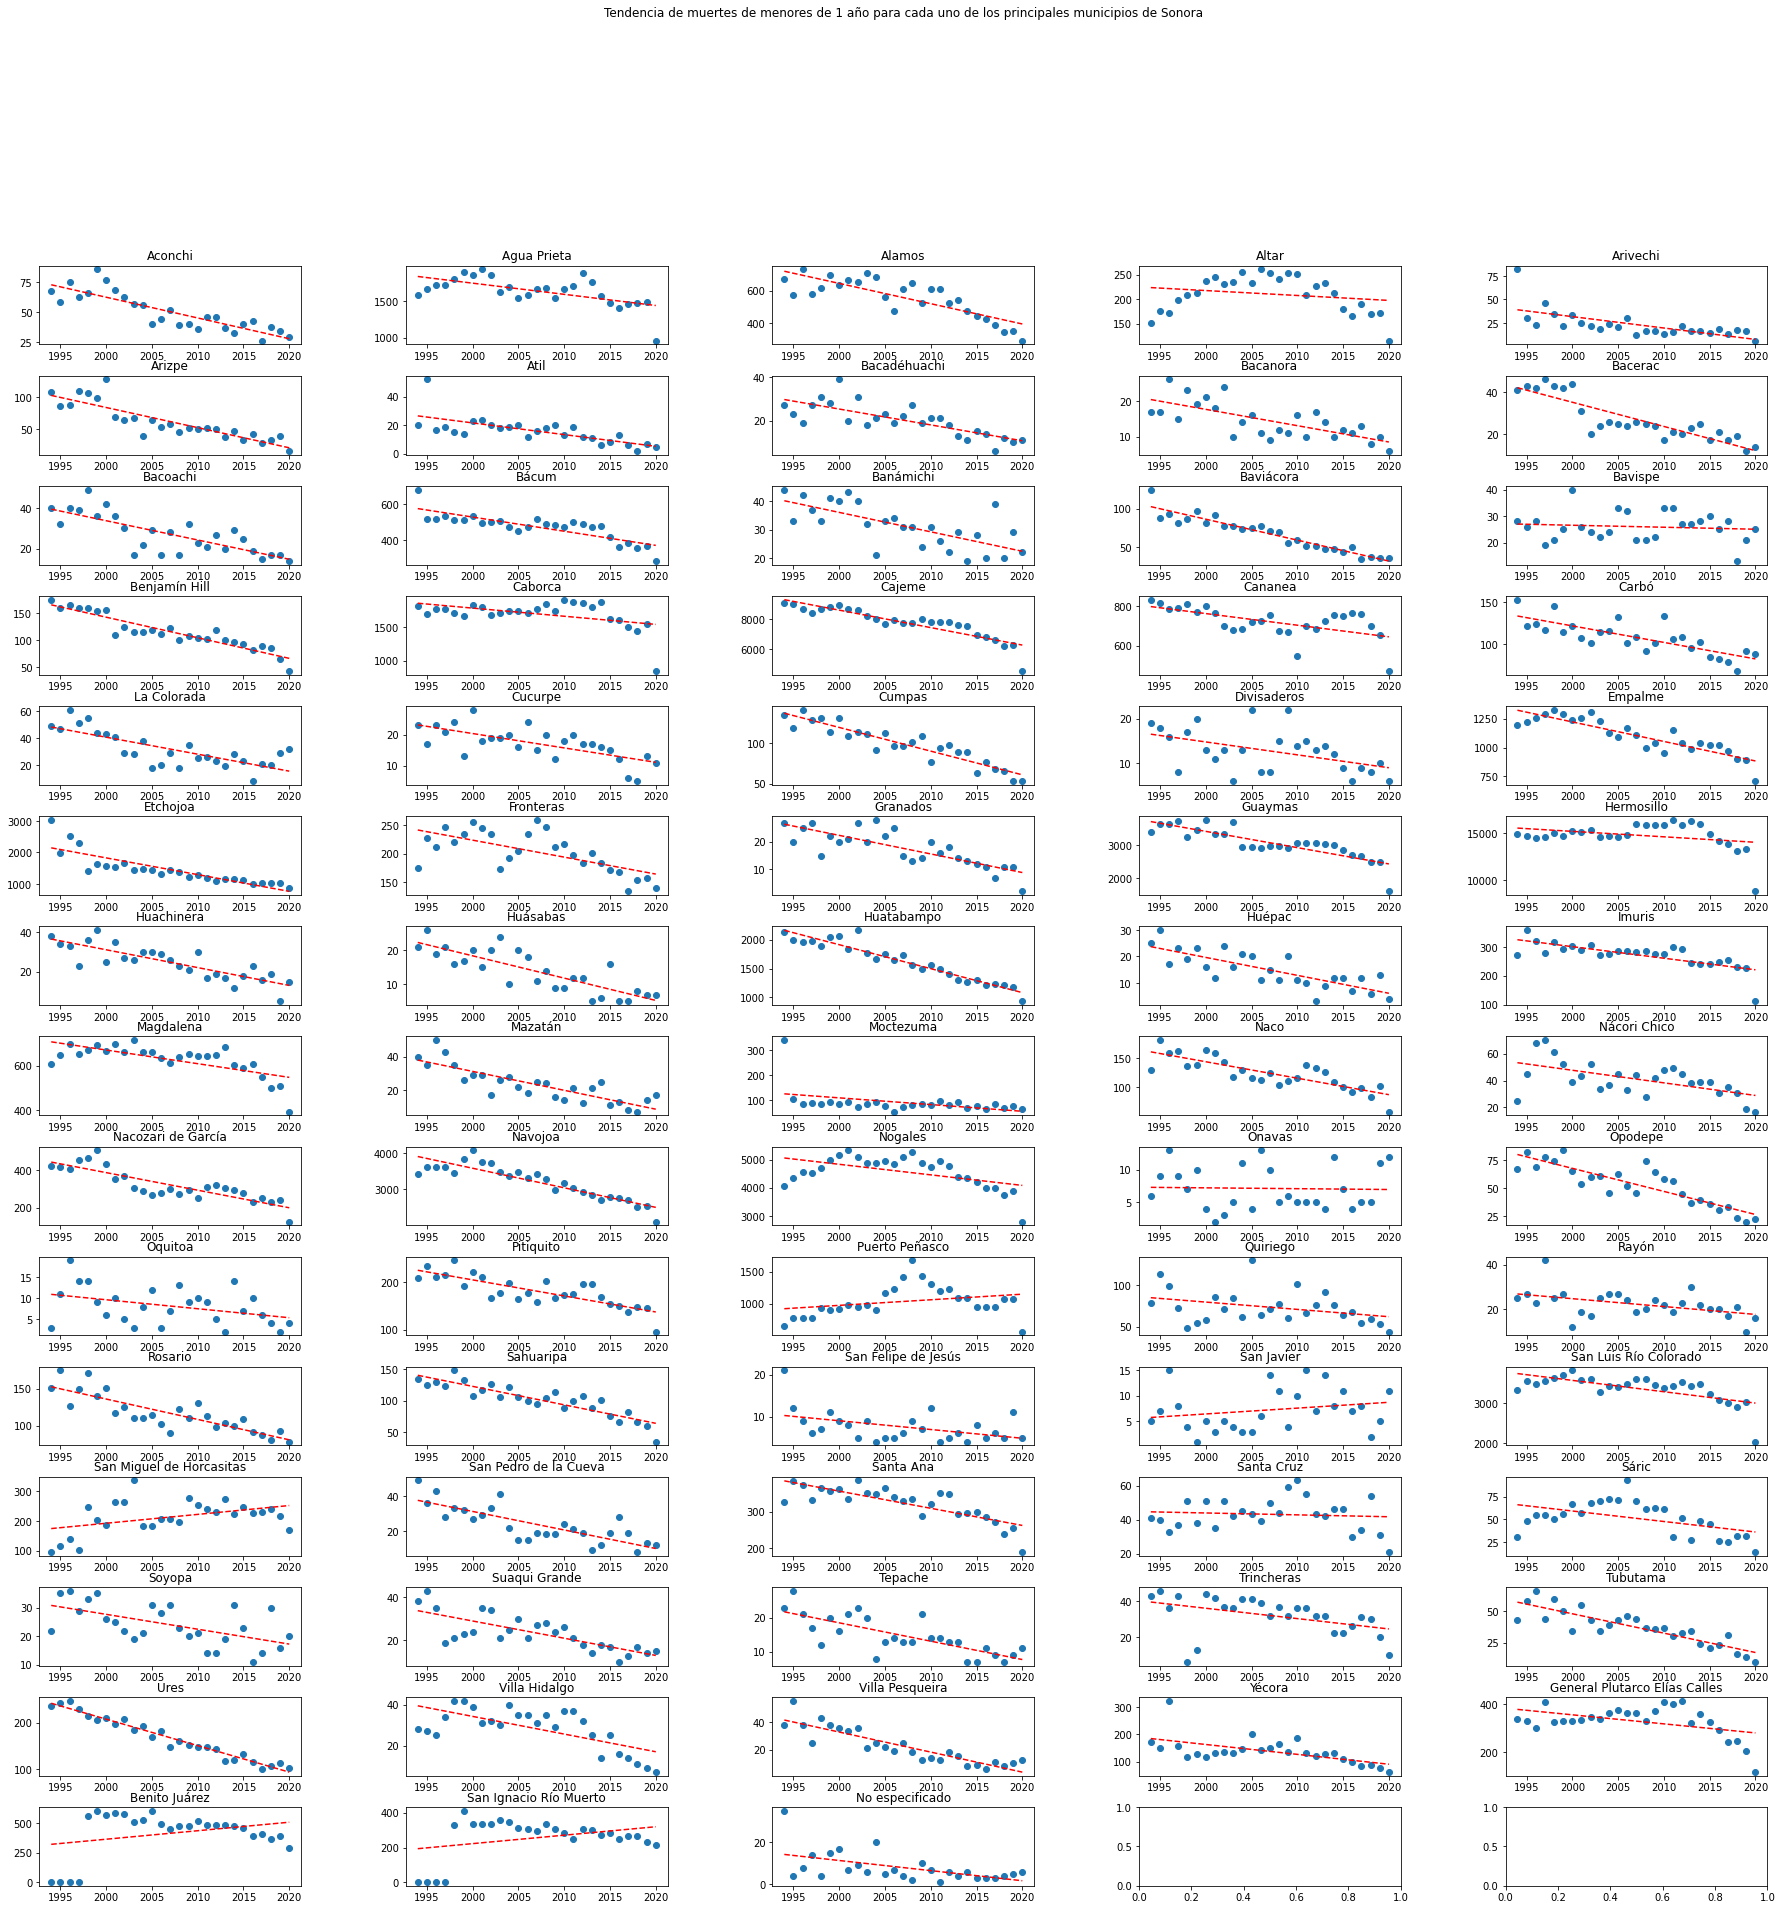

In [21]:

i = 0
fig, ax = plt.subplots(15, 5, figsize=(30,45))

for m in municipos:
    i+=1
    dff = nacimientos_tidy[nacimientos_tidy['municipio'] == m]
    plt.subplot(15, 5, i)
    plt.scatter(dff.año, dff.nacimientos)
    z = np.polyfit(dff.año, dff.nacimientos, 1)
    p = np.poly1d(z)
    plt.title(m)
    plt.plot(dff.año,p(dff.año),"r--")
    


plt.subplots_adjust(left=0.1,
                    bottom=0.4, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
fig.suptitle('Tendencia de muertes de menores de 1 año para cada uno de los principales municipios de Sonora')
plt.show()

In [16]:
import unidecode
def simplify(text):
	import unicodedata
	try:
		text = unicode(text, 'utf-8')
	except NameError:
		pass
	text = unicodedata.normalize('NFD', text).encode('ascii', 'ignore').decode("utf-8")
	return str(text)

In [18]:
nacimientos_tidy['municipio'] = nacimientos_tidy['municipio'].apply(simplify)

In [19]:
nacimientos_tidy

,municipio,año,nacimientos
0,Aconchi,1994,68.0
1,Agua Prieta,1994,1589.0
2,Alamos,1994,674.0
3,Altar,1994,151.0
4,Arivechi,1994,82.0
...,...,...,...
1966,Yecora,2020,61.0
1967,General Plutarco Elias Calles,2020,115.0
1968,Benito Juarez,2020,291.0
1969,San Ignacio Rio Muerto,2020,212.0


In [ ]:
import mapa_municipios as mm

In [ ]:
mapa = mm.mapa_mun_son(df, 'titulo barra')